# Выпускная квалификационная работа по курсу «Data Science»

## Прогнозирование конечных свойств новых материалов (композиционных материалов)

### Кузьмина Е.В.

### Часть 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
import numpy as np

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
%config InlineBackend.figure_format = 'retina'

In [2]:
df_good = pd.read_excel("D:\\data science\вкр\ВКР_композиты\df.xlsx")
df_good.drop(['Unnamed: 0'], axis = 1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.162230,0.272962,0.727777,0.514688,0,0.289334,0.546433
1,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.162230,0.272962,0.727777,0.514688,0,0.362355,0.319758
2,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0,0.362355,0.494123
3,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0,0.362355,0.546433
4,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0,0.362355,0.720799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.361662,0.444480,0.560064,0.337550,0.333908,0.703458,0.161609,0.473553,0.472912,0.183151,1,0.660014,0.320103
918,0.607674,0.704373,0.272088,0.749605,0.294428,0.362087,0.271207,0.462512,0.461722,0.157752,1,0.768759,0.437468
919,0.573391,0.498274,0.254927,0.501991,0.623085,0.334063,0.572959,0.580201,0.587558,0.572648,1,0.301102,0.679468
920,0.662497,0.748688,0.454635,0.717585,0.267818,0.466417,0.496511,0.535317,0.341643,0.434855,1,0.458245,0.516112


In [10]:
in_d = df_good[['Плотность, кг/м3',
                  'модуль упругости, ГПа', 'Количество отвердителя, м.%',
                  'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
                  'Поверхностная плотность, г/м2',
                  'Потребление смолы, г/м2', 'Угол нашивки, град',
                  'Шаг нашивки', 'Плотность нашивки', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]
out_d = df_good['Соотношение матрица-наполнитель']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(in_d, out_d, test_size = 0.3, random_state = 42)
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 645
Размер тестовой выборки: 277


In [12]:
normalizer = tf.keras.layers.Normalization(input_shape = [12,], axis = None)
normalizer.adapt(np.array(X_train))

In [13]:
X_train

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
481,0.643037,0.278232,0.234584,0.439240,0.321655,0.495611,0.623998,1,0.571430,0.433990,0.245292,0.578683
650,0.586130,0.463191,0.348338,0.616075,0.320131,0.204285,0.391352,1,0.317517,0.537455,0.966796,0.479890
483,0.532890,0.354250,0.758052,0.625457,0.716345,0.348479,0.237919,1,0.554280,0.619605,0.395444,0.569650
355,0.605695,0.692900,0.360136,0.654481,0.389632,0.456376,0.392215,0,0.474980,0.306469,0.163582,0.641999
850,0.170680,0.502517,0.470569,0.576124,0.477262,0.229392,0.682036,1,0.623942,0.429910,0.467485,0.436179
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.303772,0.201130,0.287544,0.329381,0.622672,0.026298,0.576014,0,0.549851,0.495193,0.566234,0.309596
270,0.777923,0.431133,0.526907,0.377453,0.646398,0.841346,0.500515,0,0.584309,0.410964,0.294088,0.486406
860,0.378127,0.731477,0.305836,0.655804,0.372042,0.227940,0.590147,1,0.380169,0.529197,0.791823,0.627286
435,0.781825,0.688797,0.467451,0.715422,0.431429,0.226518,0.329278,0,0.050576,0.965176,0.285892,0.456208


In [23]:
nn_model = Sequential([
                    normalizer,
                    Dense(8, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1)
                    ])

nn_model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.0005))

In [24]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 188
Trainable params: 185
Non-trainable params: 3
_________________________________________________________________


In [25]:
%%time
history = nn_model.fit(X_train, y_train, validation_split = 0.3, verbose = 1, epochs = 100)

Epoch 1/100
15/15 [==============================] - 0s 7ms/step - loss: 0.8284 - val_loss: 0.7579
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6814 - val_loss: 0.6276
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5683 - val_loss: 0.5233
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4787 - val_loss: 0.4467
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4100 - val_loss: 0.3842
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3565 - val_loss: 0.3383
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3135 - val_loss: 0.3003
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2802 - val_loss: 0.2712
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2528 - val_loss: 0.2462
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2298 - val_loss: 0.2258
Epoch 11/

In [26]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

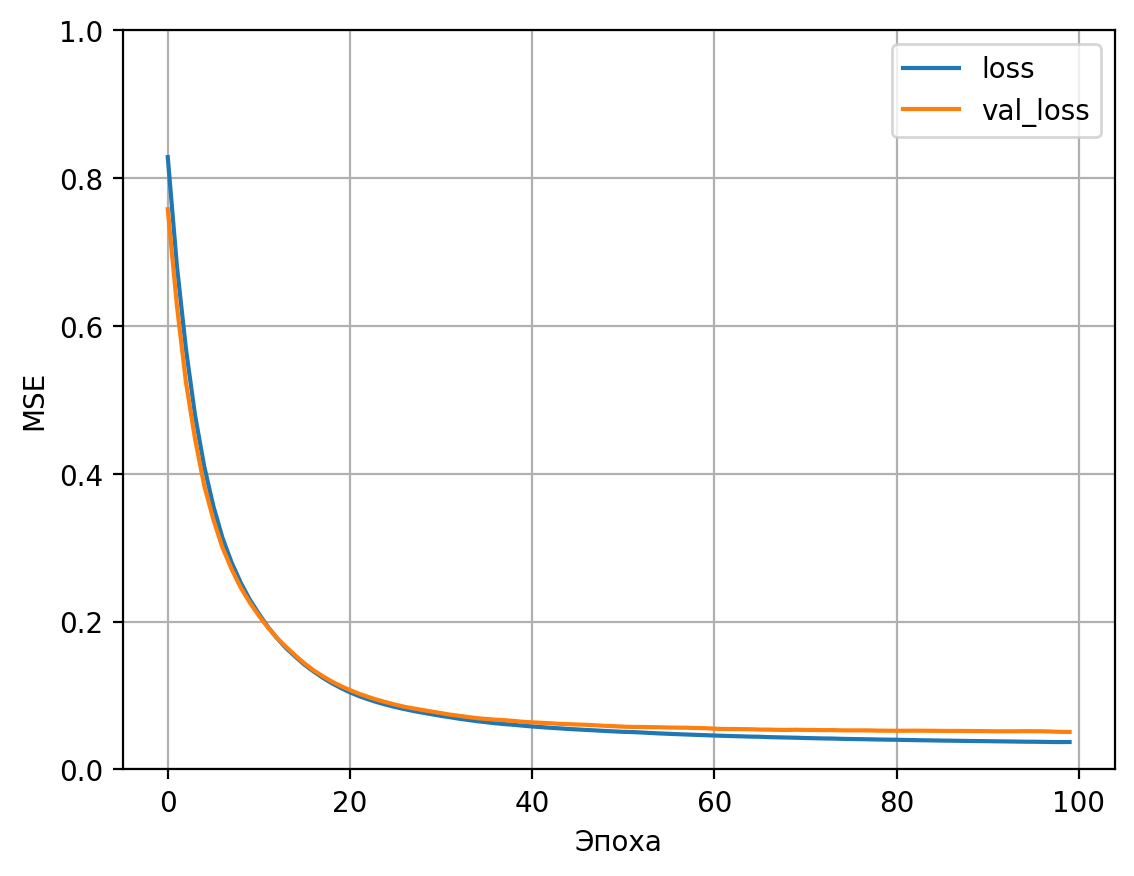

In [27]:
plot_loss(history)